<a href="https://colab.research.google.com/github/Sepren/Data_Analytic/blob/main/Seaborn_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Seaborn

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
df = pd.read_csv('heart.csv')
df['Cholesterol'] = np.where(df['Cholesterol']==0, np.nan, df['Cholesterol'])
df['RestingBP'] = np.where(df['RestingBP']==0, np.nan, df['RestingBP'])
df['FastingBS'] = np.where(df['FastingBS']==0, np.nan, df['FastingBS'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,NaN,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,NaN,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,NaN,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,NaN,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,NaN,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,NaN,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1.0,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,NaN,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,NaN,LVH,174,N,0.0,Flat,1


Seaborn также реализован на matplotlib. Outofbox решение для построения визуализации

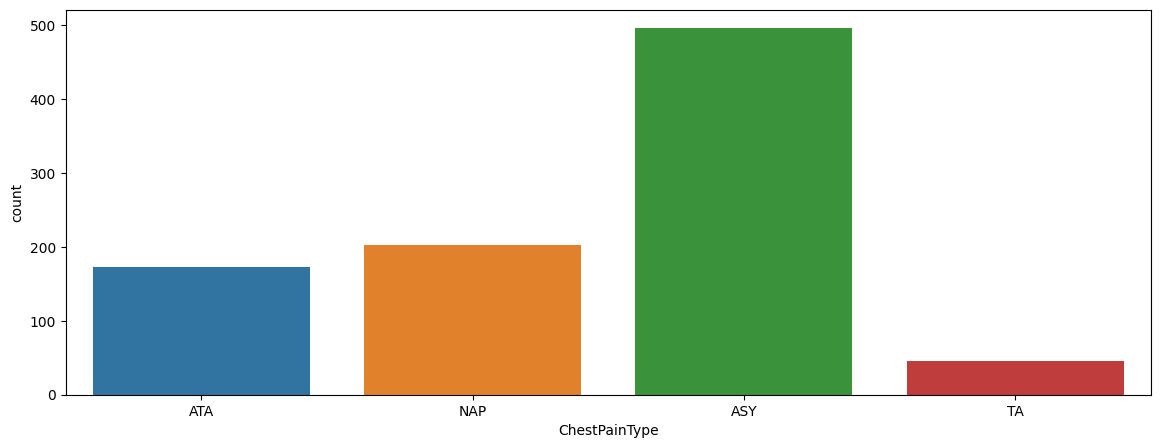

In [ ]:
fig = plt.figure(figsize=(14,5))
sns.countplot(x = df['ChestPainType'])
# pandas bar = seaborn countplot
# Делается намного проще, нет нужды в агрегации с помощью value_counts
plt.show()

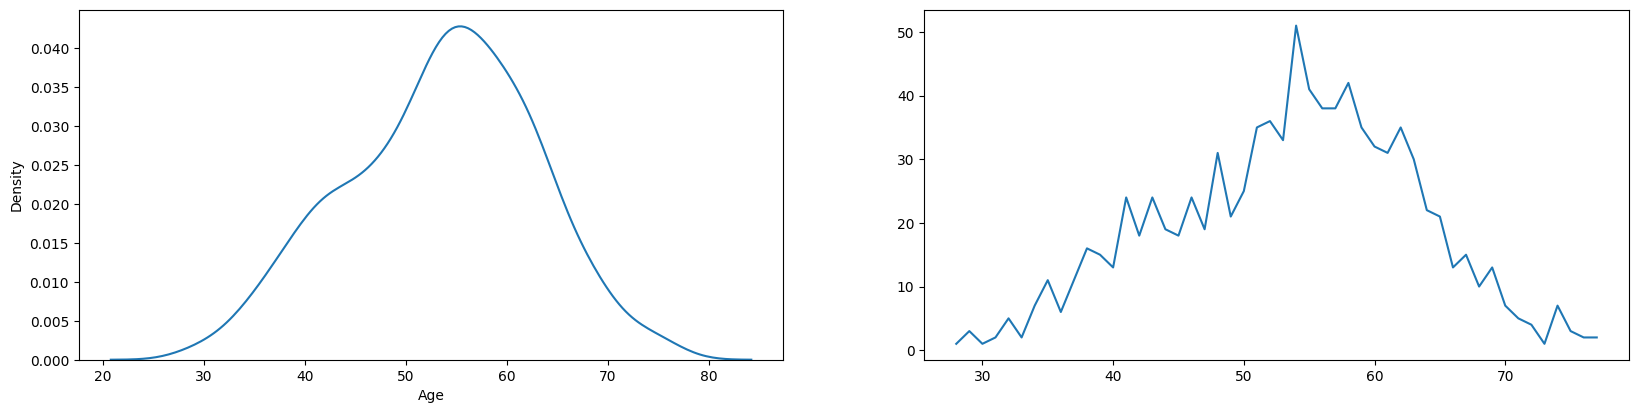

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
sns.kdeplot(df.Age.dropna())
# В статистике - оценка плотности ядра - один из вариантов сглаживания
ax2 = fig.add_subplot(222)
df['Age'].value_counts().sort_index().plot.line()
plt.show()

<ipython-input-23-589363e8cb11>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Age', y = 'Cholesterol', data = df, color='r', shade=True)


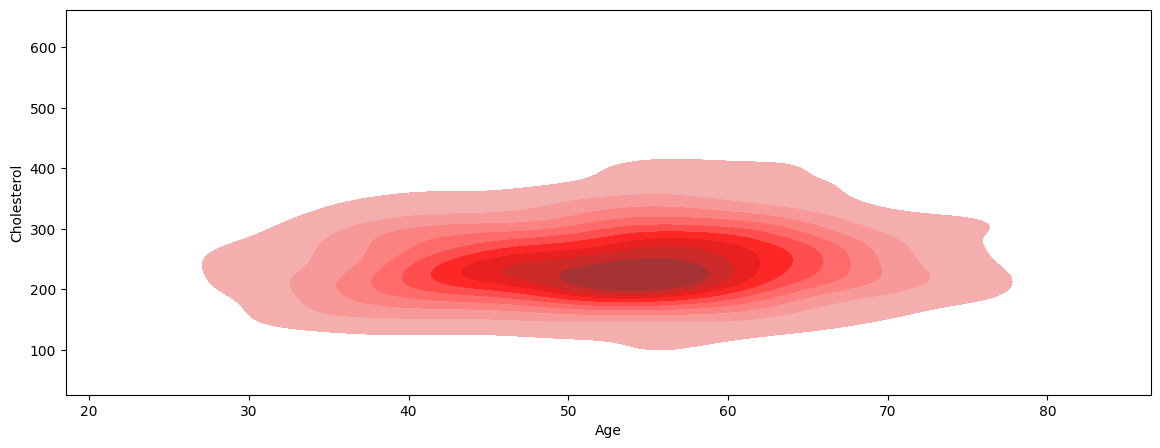

In [ ]:
fig = plt.figure(figsize=(14, 5))
sns.kdeplot(x = 'Age', y = 'Cholesterol', data = df, color='r', shade=True)
plt.show()

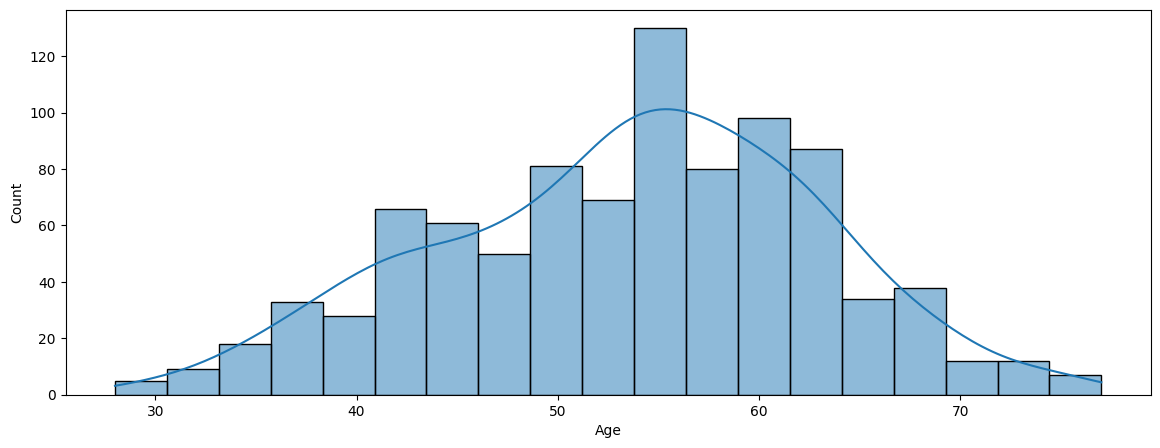

In [ ]:
# Аналог гистограммы
fig = plt.figure(figsize=(14, 5))
sns.histplot(df['Age'], kde=True)
plt.show()

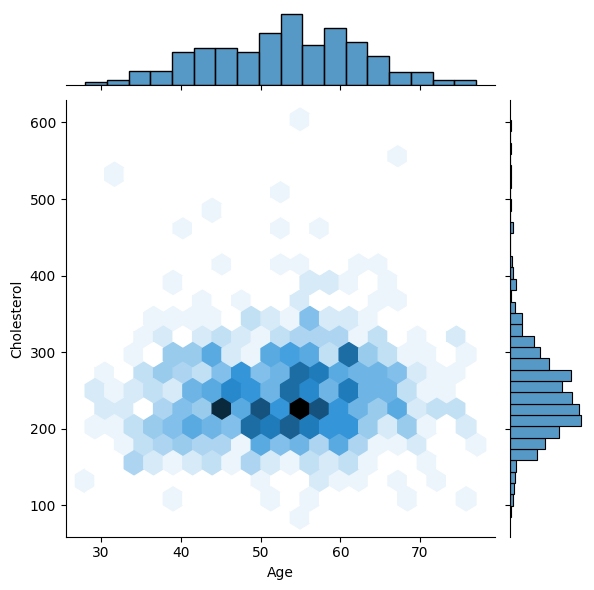

In [ ]:
# Аналог scatterplot
sns.jointplot(x='Age', y='Cholesterol', data=df, kind='hex', gridsize=20)
plt.show()

<Axes: xlabel='Cholesterol', ylabel='Age'>

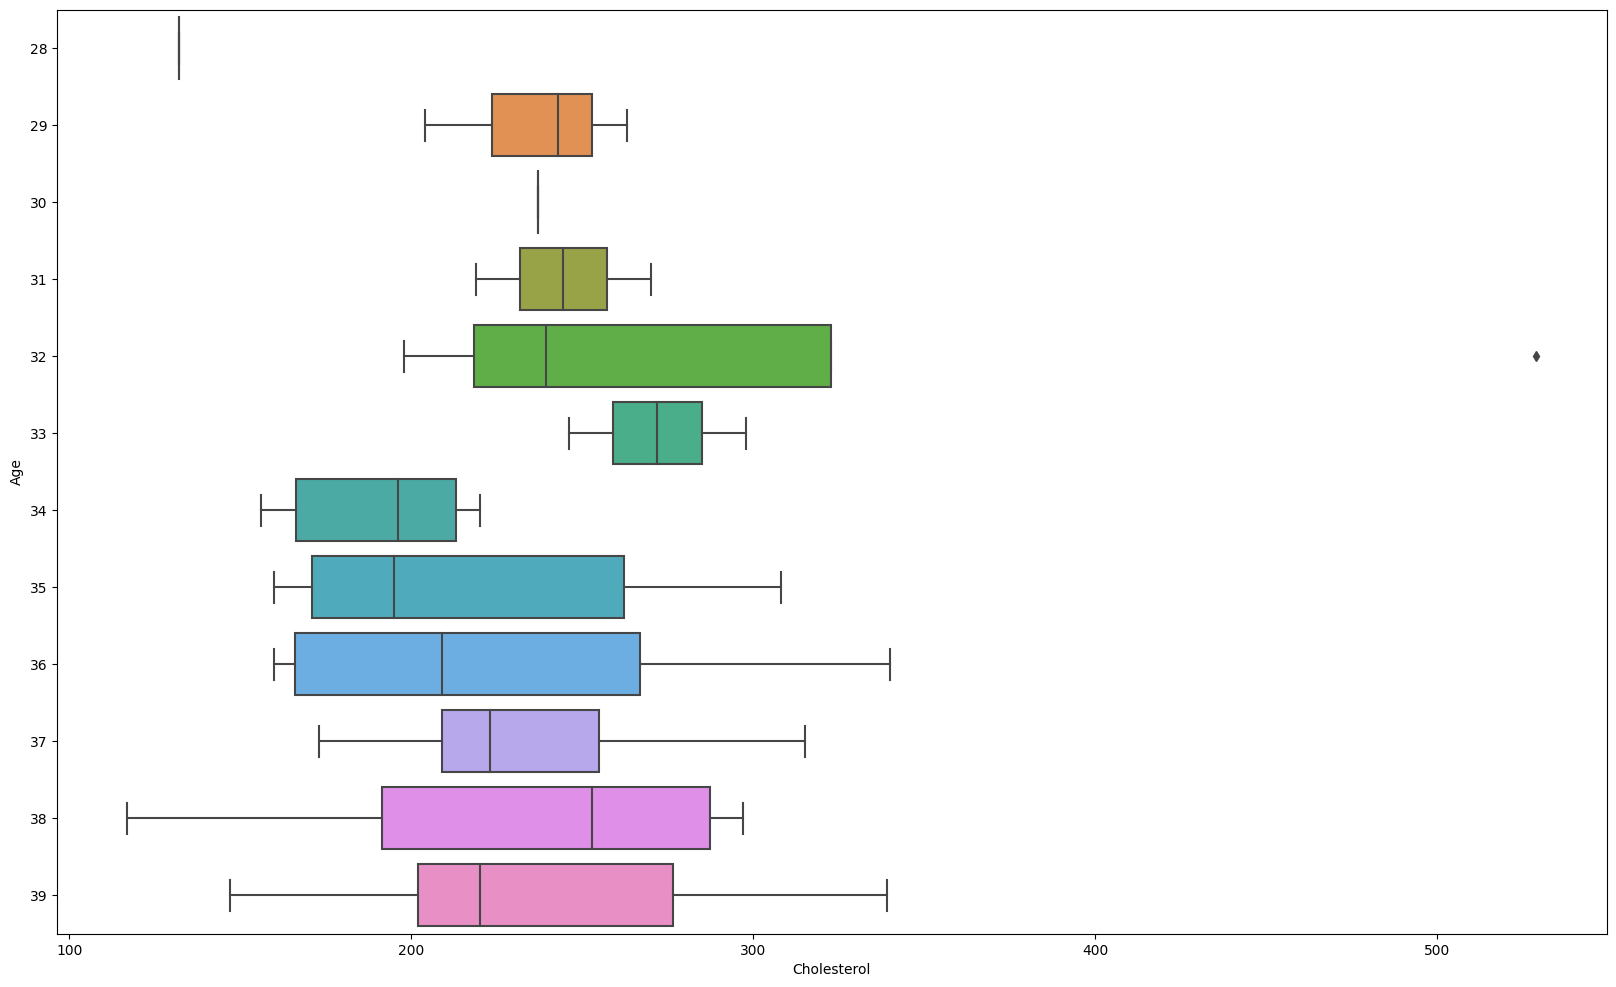

In [ ]:
plt.figure(figsize=(20, 12))
sns.boxplot(y='Age', x='Cholesterol', data=df[df.Age.isin(np.arange(20, 40, 1))], orient='h')

<Axes: xlabel='Sex', ylabel='MaxHR'>

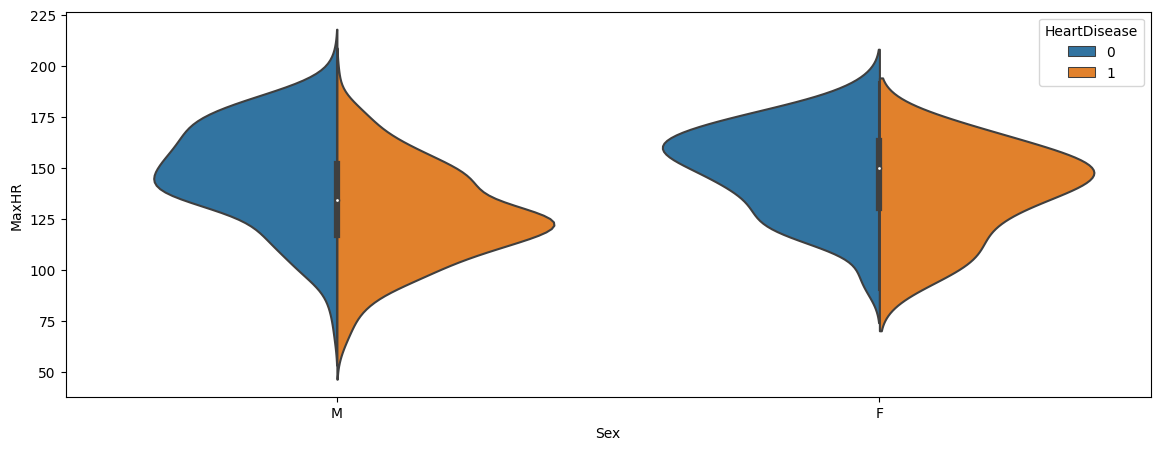

In [ ]:
fig = plt.figure(figsize=(14, 5))
sns.violinplot(y='MaxHR', x='Sex', hue='HeartDisease', split=True, data=df)

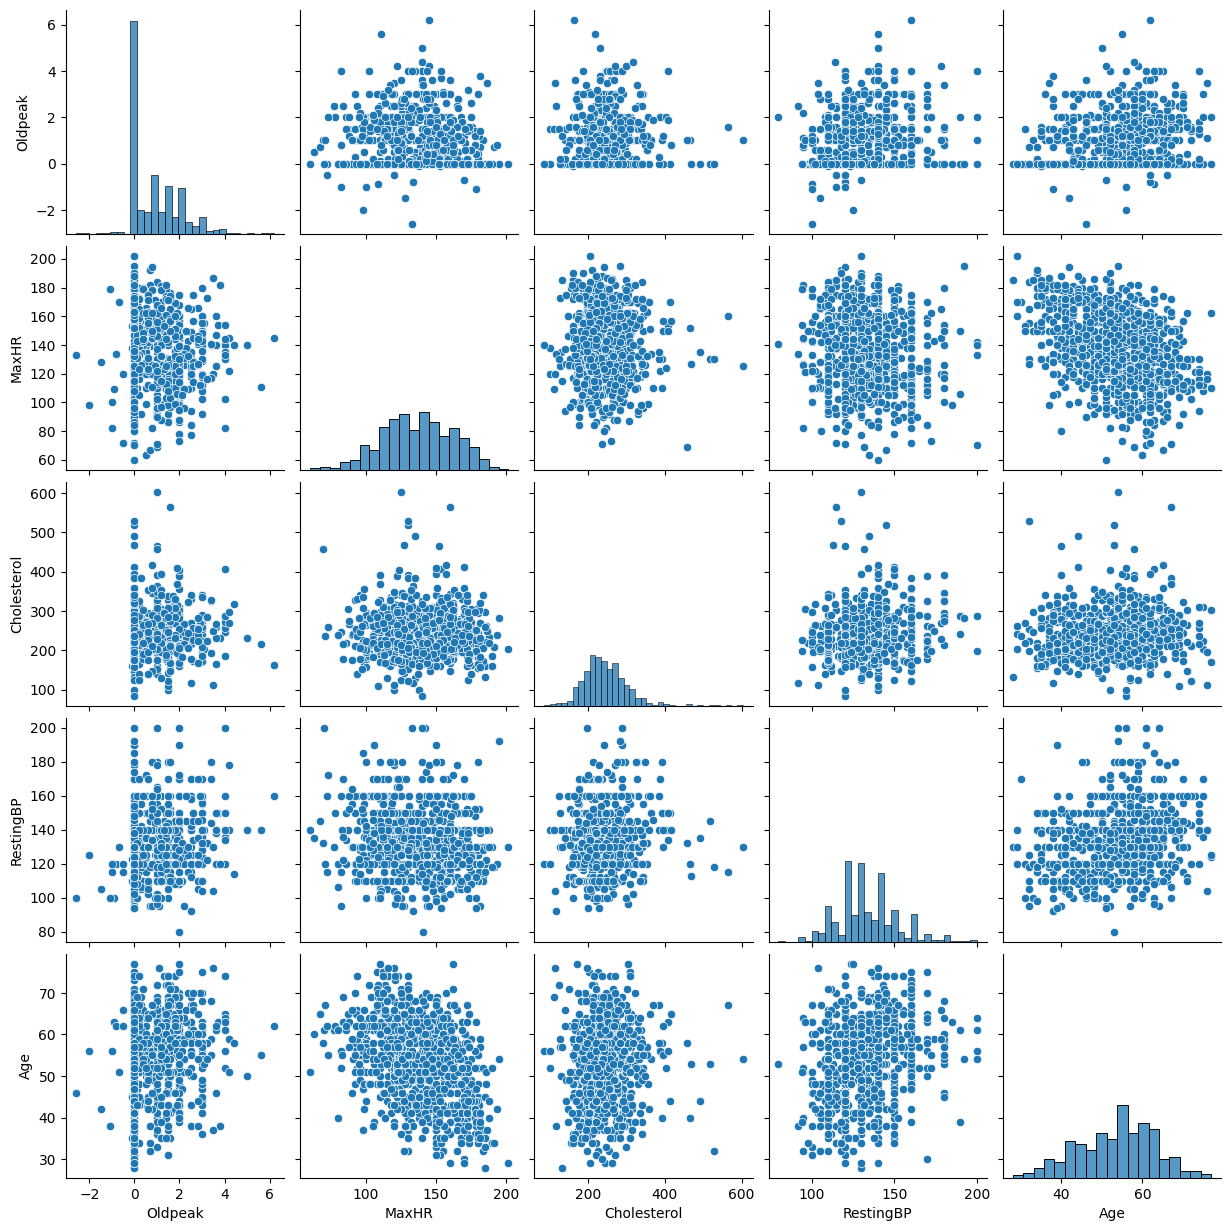

In [ ]:
cols = ['Oldpeak', 'MaxHR', 'Cholesterol', 'RestingBP', 'Age']
sns_plot = sns.pairplot(df[cols])

In [ ]:
# Корреляцция признаков
df[cols].dropna().corr()

,Oldpeak,MaxHR,Cholesterol,RestingBP,Age
Oldpeak,1.000000,-0.259533,0.058488,0.198575,0.286006
MaxHR,-0.259533,1.000000,-0.019856,-0.125774,-0.382112
Cholesterol,0.058488,-0.019856,1.000000,0.095939,0.058758
RestingBP,0.198575,-0.125774,0.095939,1.000000,0.259865
Age,0.286006,-0.382112,0.058758,0.259865,1.000000


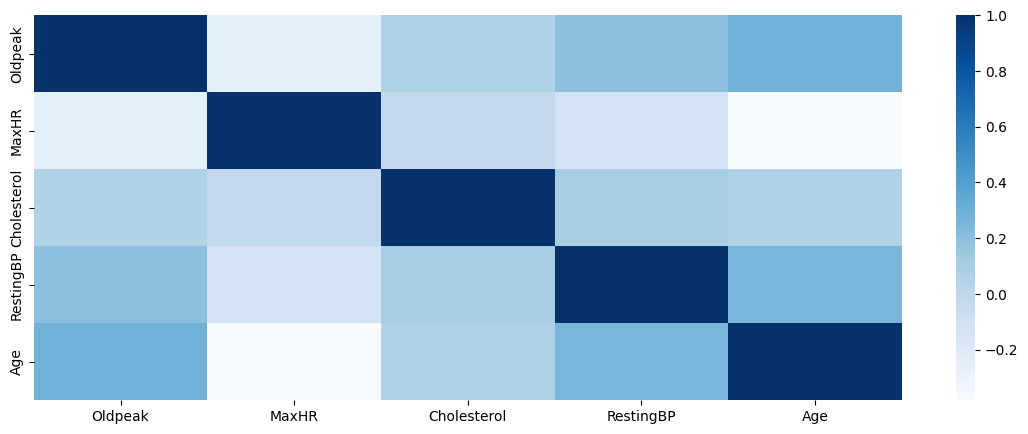

In [ ]:
# Тепловая карта
fig = plt.figure(figsize=(14, 5))
sns.heatmap(df[cols].dropna().corr(), cmap = 'Blues')
plt.show()

# Folium

In [1]:
import folium
from folium import plugins

In [4]:
partizan = pd.read_excel('partizan.xlsx')
partizan.tail()

,chain_name,lon,lat,orders
30,Zvjezda,37.718238,55.794452,4
31,Amazonija,37.748619,55.791744,5
32,Spasibo,37.728523,55.818736,0
33,Gurman_msk,37.734201,55.783089,0
34,Super_Papas,37.751179,55.780795,0


In [9]:
lats = list(partizan.lat)
longs = list(partizan.lat)
places = [[x[0], x[1]] for x in zip(lats, longs)]

m = folium.Map(places[0], tiles = 'OpenStreetMap', zoom_start=13)

plugins.MarkerCluster(places).add_to(m)
# plugins.BoatMarker(places[0]).add_to(m)
# plugins.FastMarkerCluster(places).add_to(m)

m

# Plotly

In [11]:
import plotly.express as px
import plotly as py

In [12]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="size", facet_col="sex",
                 color_continuous_scale=px.colors.sequential.Viridis, render_mode="webg1")
fig.show()

In [14]:
df = px.data.gapminder()
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

In [15]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                 size="pop", color="continent", hover_name="country", facet_col="continent",
                 log_x=True, size_max=45, range_x=[100, 100000], range_y=[25, 90])
fig.show()

In [16]:
py.offline.plot(fig, filename = 'magic.html', auto_open=False)

'magic.html'